# 

# Overview

- Check for null counts
- Observe correlation with target variable
- Analyze distribution of features

In [45]:
# Import the necessary packages from utils file
from utils import pd, np, plt, sns

In [54]:
#load dataframe
df = pd.read_csv('../data/interim/eeg_motor_imagery.csv')
df.head()

,trial_id,subject_id,ch1_std,ch1_mean,ch1_max,ch1_min,ch2_std,ch2_mean,ch2_max,ch2_min,...,ch62_min,ch63_std,ch63_mean,ch63_max,ch63_min,ch64_std,ch64_mean,ch64_max,ch64_min,label
0,0,S012R04,0.000028,-0.000010,0.000059,-0.000111,0.000028,-0.000006,0.000062,-0.000093,...,-0.000063,0.000021,-4.080704e-06,0.000067,-0.000056,0.000019,-6.626980e-07,0.000056,-0.000053,1
1,656,S012R04,0.000033,0.000006,0.000111,-0.000079,0.000022,0.000003,0.000057,-0.000047,...,-0.000036,0.000020,3.332963e-06,0.000045,-0.000043,0.000019,3.642887e-06,0.000047,-0.000040,2
2,1312,S012R04,0.000026,-0.000003,0.000058,-0.000077,0.000018,-0.000004,0.000049,-0.000052,...,-0.000047,0.000018,-1.986943e-06,0.000036,-0.000043,0.000017,-2.827891e-06,0.000037,-0.000043,1
3,1968,S012R04,0.000026,-0.000004,0.000056,-0.000079,0.000027,-0.000002,0.000063,-0.000068,...,-0.000062,0.000024,1.415632e-06,0.000064,-0.000056,0.000025,2.380007e-06,0.000062,-0.000058,3
4,2624,S012R04,0.000030,0.000005,0.000105,-0.000056,0.000024,0.000003,0.000066,-0.000046,...,-0.000055,0.000021,4.673331e-07,0.000047,-0.000053,0.000018,8.674011e-07,0.000049,-0.000041,1


In [55]:
#Observe target variable
df['label'].head(10)

0    1
1    2
2    1
3    3
4    1
5    2
6    1
7    3
8    1
9    2
Name: label, dtype: int64

In [56]:
#check for columns with  more than one null 
null_counts = df.isna().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [57]:
# observe unique count for columns
df[['trial_id', 'subject_id', 'label']].nunique()


trial_id      59
subject_id    14
label          3
dtype: int64

In [50]:
# Find constant features

In [58]:
#Check for high correlation with target

correlations = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
correlations.head(15)

label        1.000000
ch23_min     0.153834
ch22_min     0.144557
ch24_min     0.133925
ch25_min     0.127239
ch64_mean    0.096576
ch28_min     0.095656
ch26_min     0.093182
ch29_min     0.082811
ch27_min     0.080074
ch60_mean    0.078795
ch54_mean    0.075126
ch55_mean    0.074667
ch61_std     0.068557
ch63_mean    0.067764
Name: label, dtype: float64

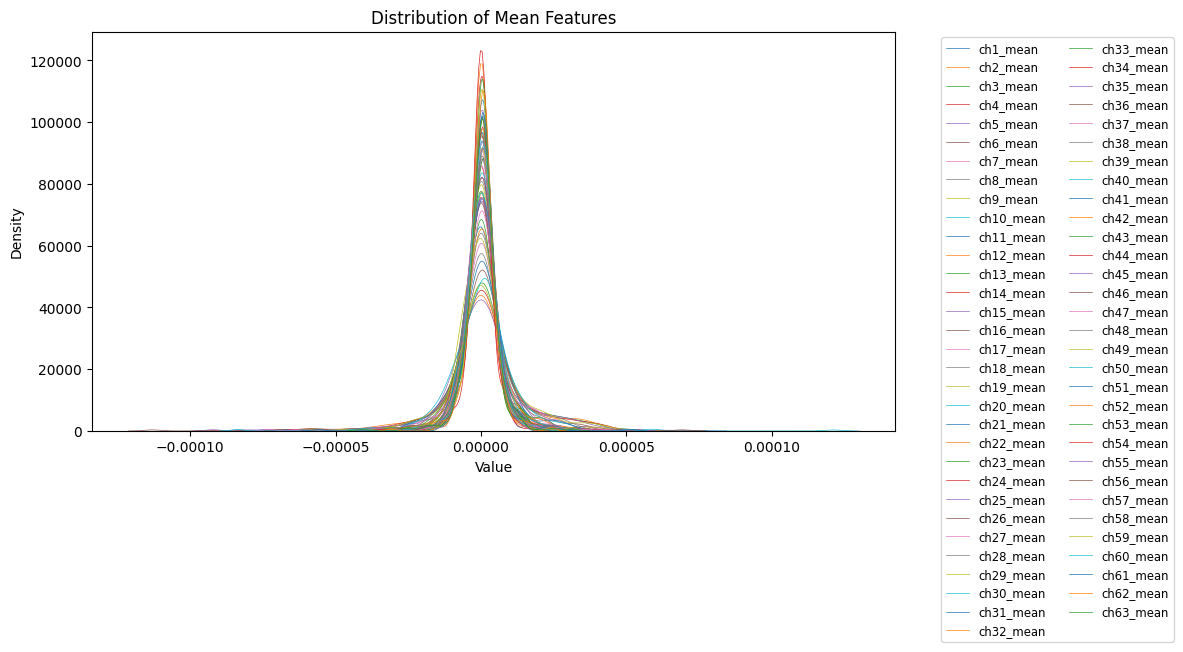

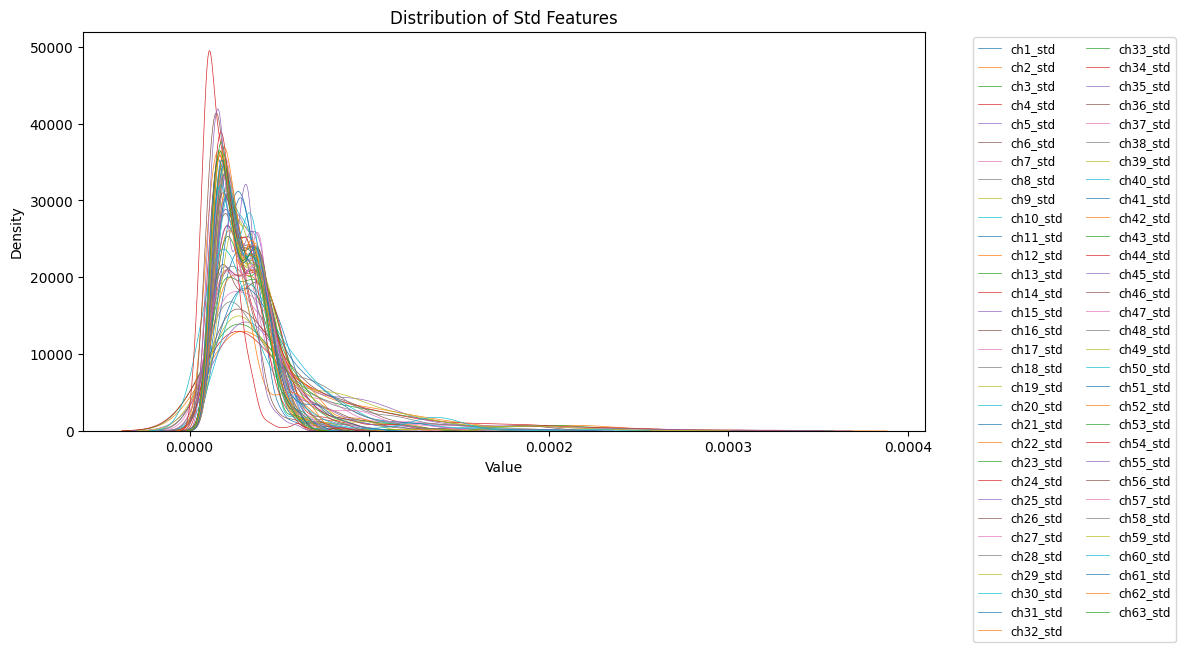

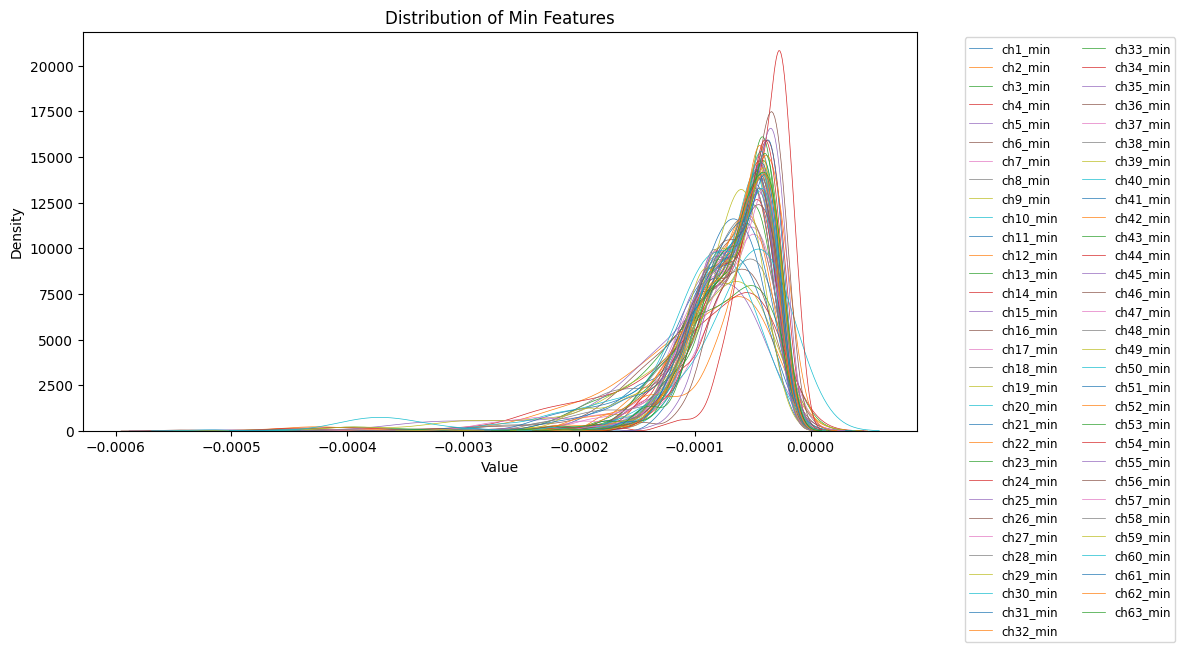

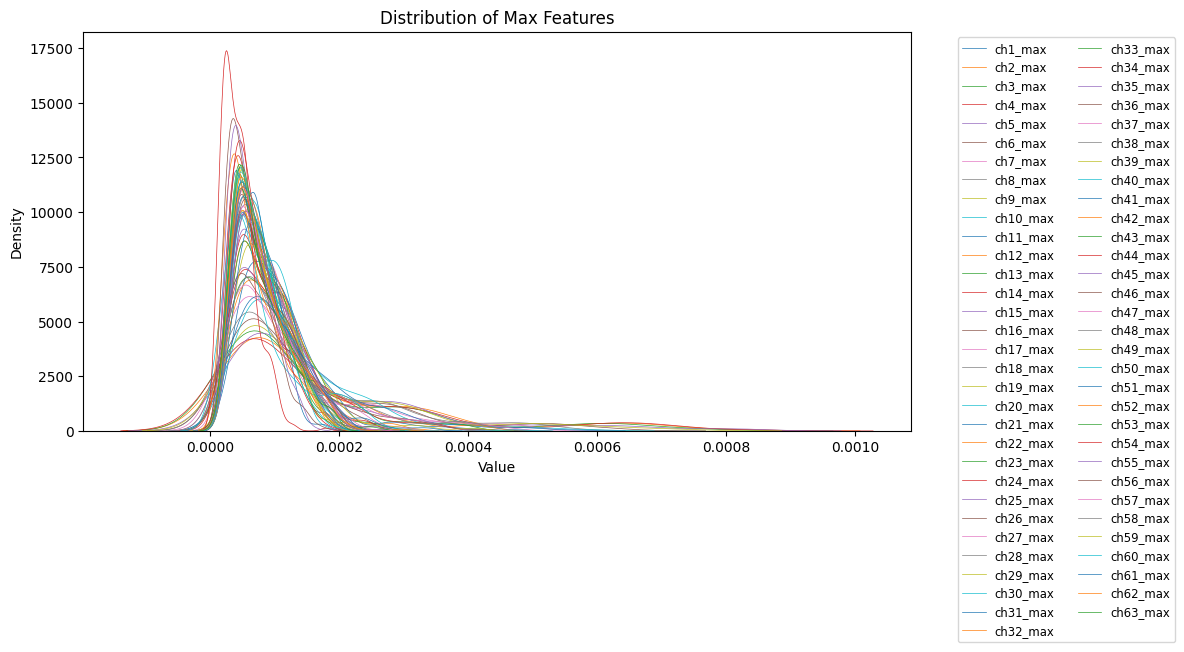

In [52]:
#Analyze Distribution

#filter group of features per metric
mean_features = [f'ch{i}_mean' for i in range(1,64)]

std_features = [f'ch{i}_std' for i in range(1,64)]

min_features = [f'ch{i}_min' for i in range(1,64)]

max_features = [f'ch{i}_max' for i in range(1,64)]

#create function to plot each group
def plot_grouped_distributions(df, feature_group, title):
    plt.figure(figsize=(12, 6))
    for feature in feature_group:
        sns.kdeplot(df[feature], label=feature, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
    plt.tight_layout()
    plt.show()

#plot distribution of each group
plot_grouped_distributions(df, mean_features, "Distribution of Mean Features")
plot_grouped_distributions(df, std_features, "Distribution of Std Features")
plot_grouped_distributions(df, min_features, "Distribution of Min Features")
plot_grouped_distributions(df, max_features, "Distribution of Max Features")


In [59]:
# print list of features with low variance
(df.std(numeric_only=True).sort_values(ascending=True)).head(20)


ch59_mean    0.000005
ch53_mean    0.000005
ch64_mean    0.000005
ch20_mean    0.000005
ch51_mean    0.000005
ch14_mean    0.000005
ch52_mean    0.000005
ch62_mean    0.000005
ch17_mean    0.000005
ch50_mean    0.000005
ch21_mean    0.000005
ch19_mean    0.000005
ch11_mean    0.000005
ch18_mean    0.000005
ch12_mean    0.000006
ch58_mean    0.000006
ch10_mean    0.000006
ch54_mean    0.000006
ch49_mean    0.000006
ch5_mean     0.000006
dtype: float64

array([[<Axes: title={'center': 'ch1_std'}>,
        <Axes: title={'center': 'ch2_std'}>,
        <Axes: title={'center': 'ch3_std'}>,
        <Axes: title={'center': 'ch4_std'}>,
        <Axes: title={'center': 'ch5_std'}>,
        <Axes: title={'center': 'ch6_std'}>,
        <Axes: title={'center': 'ch7_std'}>,
        <Axes: title={'center': 'ch8_std'}>],
       [<Axes: title={'center': 'ch9_std'}>,
        <Axes: title={'center': 'ch10_std'}>,
        <Axes: title={'center': 'ch11_std'}>,
        <Axes: title={'center': 'ch12_std'}>,
        <Axes: title={'center': 'ch13_std'}>,
        <Axes: title={'center': 'ch14_std'}>,
        <Axes: title={'center': 'ch15_std'}>,
        <Axes: title={'center': 'ch16_std'}>],
       [<Axes: title={'center': 'ch17_std'}>,
        <Axes: title={'center': 'ch18_std'}>,
        <Axes: title={'center': 'ch19_std'}>,
        <Axes: title={'center': 'ch20_std'}>,
        <Axes: title={'center': 'ch21_std'}>,
        <Axes: title={'center': 'ch22_std

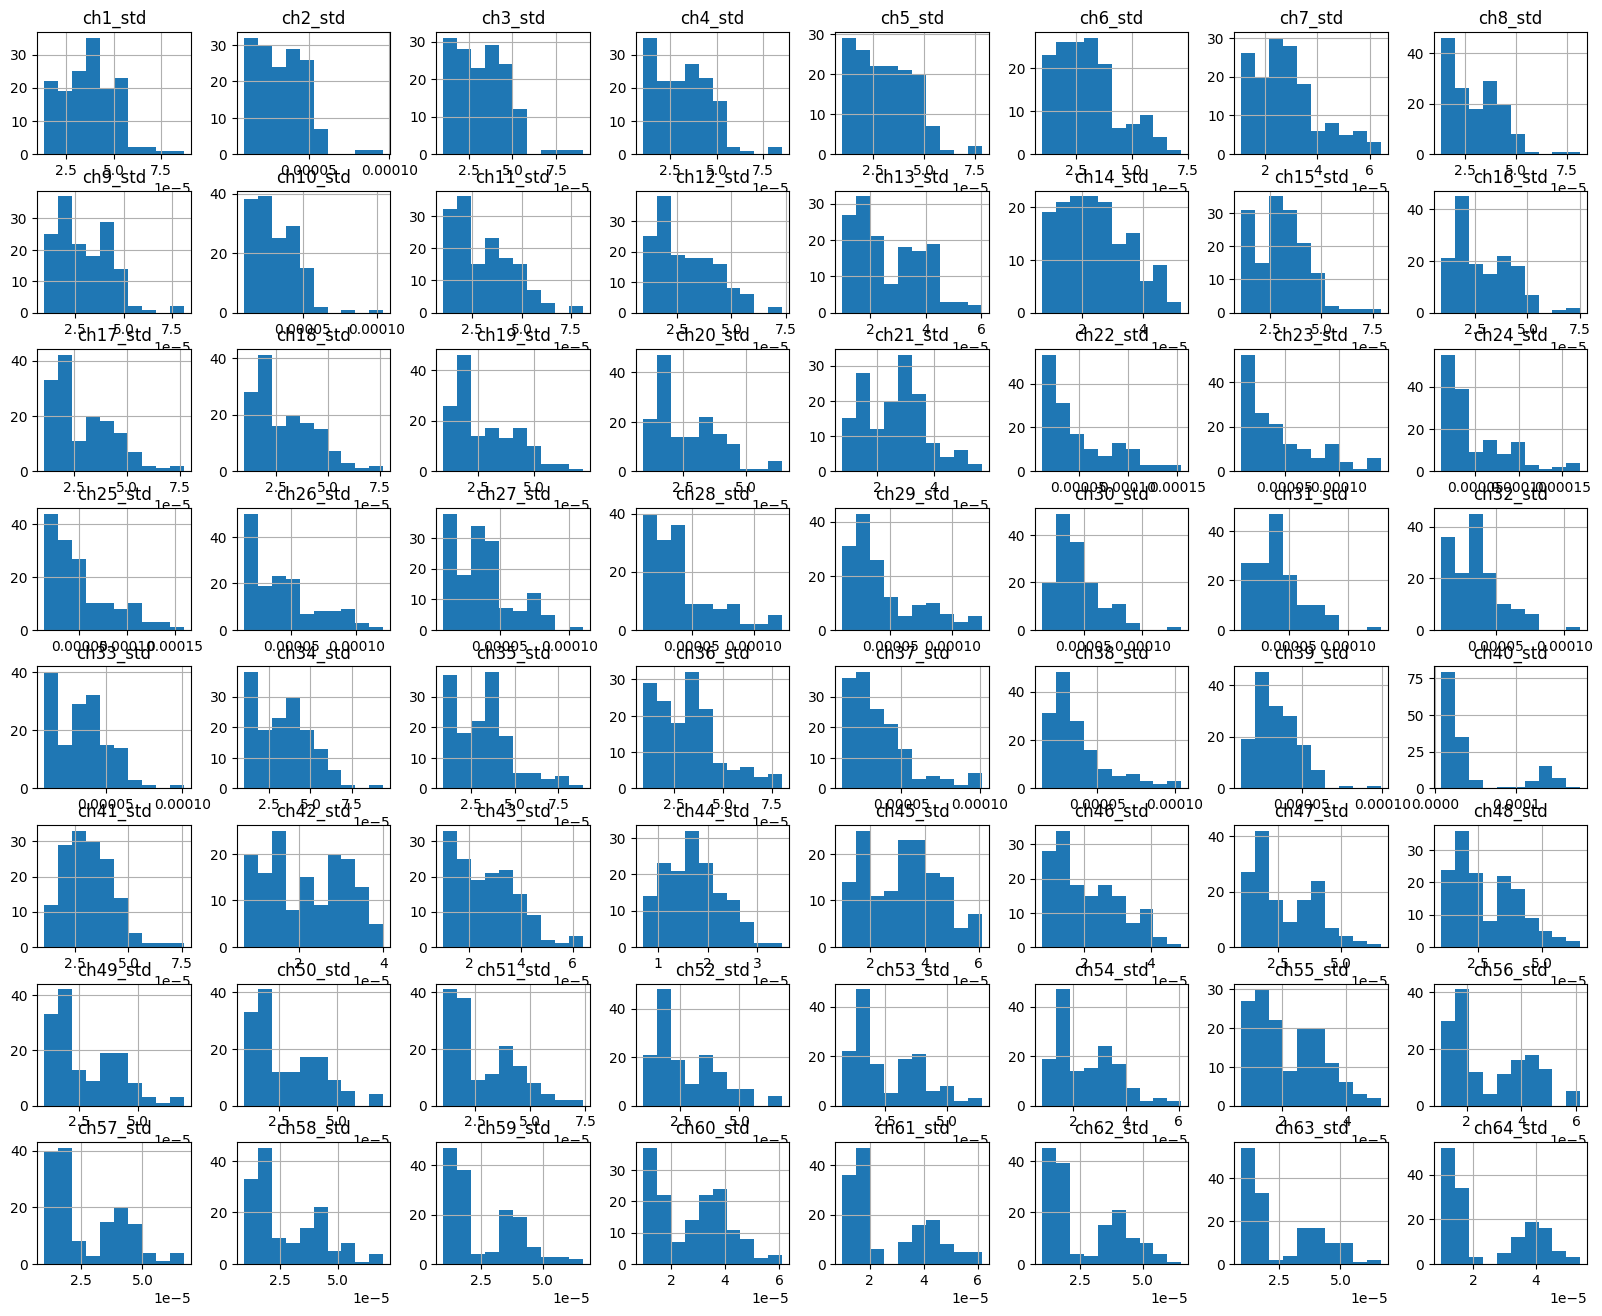

In [43]:
# Print histogram charts for std features 
std_features = [col for col in df.columns if 'std' in col]

df[std_features].hist(figsize=(20, 16), layout=(8, 8))


Axes(0.125,0.11;0.775x0.77)
label std: 0.8258075908258387
label
1    210
2    107
3    103
Name: count, dtype: int64


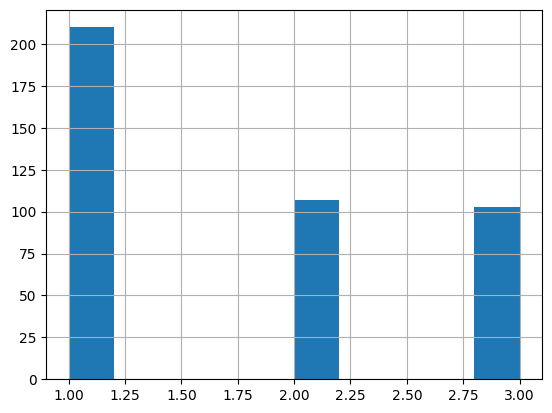

In [60]:
# Analyze Target Variable
print(df['label'].hist())
print(f"label std: {df['label'].std()}")
print(df['label'].value_counts())


# Key Takeaways
 - Label 1 represents rest state and should be removed from the dataset. After removal, labels should be remapped: 2 → 0 (left hand), 3 → 1 (right hand)
 - Rest state represents half of the data
 - Dataset contains no null values
 - Each trial_id is unique within a subject_id
 - No strong correlation was identified with the target label
 - Some features have low variance
 